In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

# Data Collection

In [2]:
now = datetime.now()
start = datetime(now.year-10,now.month,now.day)
end = now
ticker = 'AAPL'
df = yf.download(ticker , start , end)

df.columns = df.columns.get_level_values(0)


/var/folders/hp/x7md49y15vb9c1_jhjs26xqc0000gn/T/ipykernel_57909/2827651138.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker , start , end)
[*********************100%***********************]  1 of 1 completed


In [3]:
df

Price,Close,High,Low,Open,Volume
Date,,,,,
2015-09-03,24.802963,25.344551,24.728803,25.279380,212935600
2015-09-04,24.555767,24.820943,24.384977,24.488350,199985200
2015-09-08,25.238928,25.295109,24.791724,25.113082,219374400
2015-09-09,24.753523,25.623210,24.668126,25.564782,340043200
2015-09-10,25.297359,25.456914,24.697343,24.780490,251571200
...,...,...,...,...,...
2025-08-26,229.309998,229.490005,224.690002,226.869995,54575100
2025-08-27,230.490005,230.899994,228.259995,228.610001,31259500
2025-08-28,232.559998,233.410004,229.339996,230.820007,38074700


In [20]:
df.shape

(2514, 5)

In [10]:
df.dtypes

Price   Ticker
Close   AAPL      float64
High    AAPL      float64
Low     AAPL      float64
Open    AAPL      float64
Volume  AAPL        int64
dtype: object

In [12]:
df.isna().sum()

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

In [13]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,2510.000000,2510.000000,2510.000000,2510.000000,2.510000e+03
mean,106.618188,107.685118,105.439391,106.515650,1.061706e+08
std,69.626867,70.307384,68.861773,69.551007,5.984015e+07
min,20.624050,20.927682,20.425436,20.546432,7.308610e+06
25%,40.238955,40.649523,39.818042,40.247008,6.530578e+07
50%,110.004665,112.198140,109.061118,110.821746,9.216420e+07
75%,167.631210,169.171026,166.094167,167.672180,1.298989e+08
max,258.103729,259.179926,256.718662,257.276679,5.334788e+08


In [4]:
df = df.reset_index()

In [5]:
df.tail()

Price,Date,Close,High,Low,Open,Volume
2508,2025-08-26,229.309998,229.490005,224.690002,226.869995,54575100
2509,2025-08-27,230.490005,230.899994,228.259995,228.610001,31259500
2510,2025-08-28,232.559998,233.410004,229.339996,230.820007,38074700
2511,2025-08-29,232.139999,233.380005,231.369995,232.509995,39418400
2512,2025-09-02,229.720001,230.850006,226.970001,229.250000,43804400


Text(0, 0.5, 'Close price')

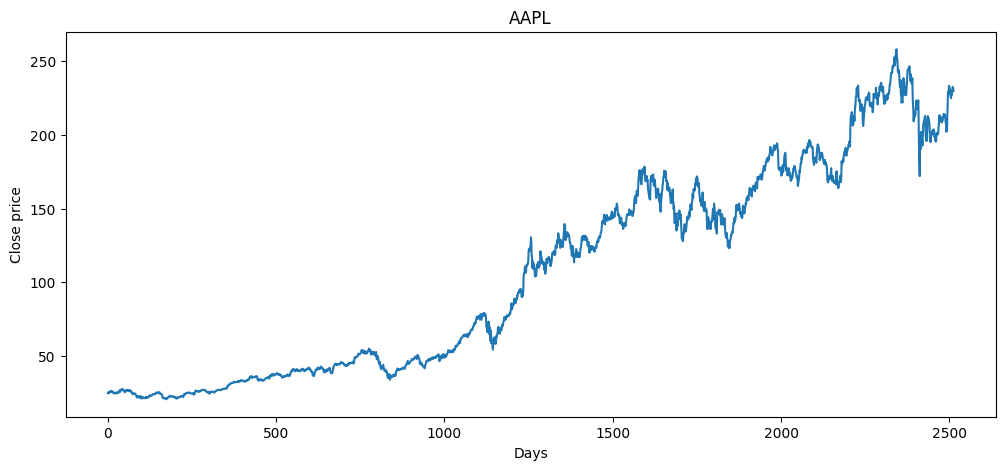

In [6]:
plt.figure(figsize=(12, 5))
plt.plot(df.Close)
plt.title(ticker)
plt.xlabel('Days')
plt.ylabel('Close price')

# feature engineering

In [21]:
# 100 days moving average
df['Close_MA_100'] = df['Close'].rolling(100).mean()
df.tail()

Price,Date,Close,High,Low,Open,Volume,Close_MA_100,Close_MA_200
2508,2025-08-26,229.309998,229.490005,224.690002,226.869995,54575100,207.172083,220.569821
2509,2025-08-27,230.490005,230.899994,228.259995,228.610001,31259500,207.450044,220.613829
2510,2025-08-28,232.559998,233.410004,229.339996,230.820007,38074700,207.896444,220.644498
2511,2025-08-29,232.139999,233.380005,231.369995,232.509995,39418400,208.407675,220.674412
2512,2025-09-02,229.720001,230.850006,226.970001,229.250000,43804400,208.984885,220.705828


In [19]:
# 200 days moving average
df['Close_MA_200'] = df['Close'].rolling(200).mean()
df.tail()

Price,Date,Close,High,Low,Open,Volume,Close_MA_100,Close_MA_200
2508,2025-08-26,229.309998,229.490005,224.690002,226.869995,54575100,207.172083,220.569821
2509,2025-08-27,230.490005,230.899994,228.259995,228.610001,31259500,207.450044,220.613829
2510,2025-08-28,232.559998,233.410004,229.339996,230.820007,38074700,207.896444,220.644498
2511,2025-08-29,232.139999,233.380005,231.369995,232.509995,39418400,208.407675,220.674412
2512,2025-09-02,229.720001,230.850006,226.970001,229.250000,43804400,208.984885,220.705828


Text(0, 0.5, 'Close price')

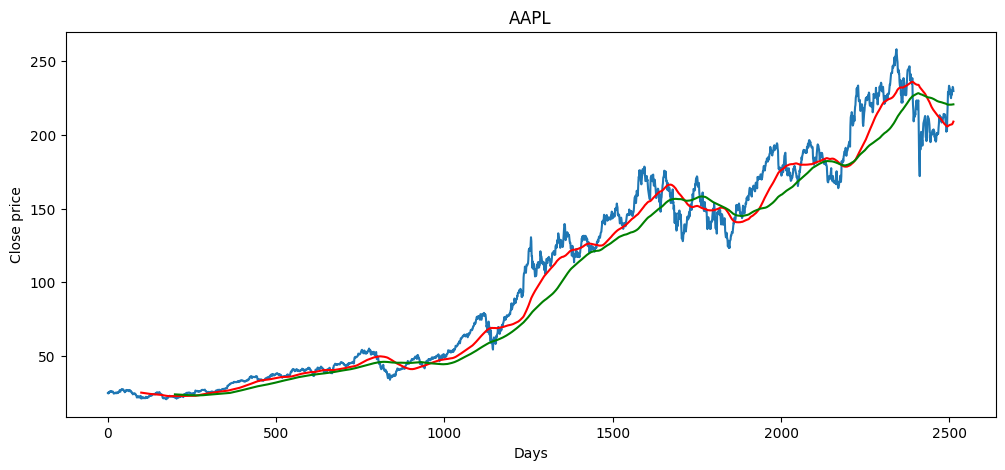

In [22]:
plt.figure(figsize=(12, 5))
plt.plot(df.Close)
plt.plot(df['Close_MA_100'] , 'r')
plt.plot(df['Close_MA_200'] , 'g')
plt.title(ticker)
plt.xlabel('Days')
plt.ylabel('Close price')